Database: World Happiness Report
Source: Kaggle(https://www.kaggle.com/datasets)
Domain: socioeconomic indicators
Data description: The data comes from the Gallup World Poll survey. Current life is evaluated on a scale from 0 (worst possible life) to 10 (best possible life). Factors such as economic status, social support, life expectancy, freedom, absence of corruption and generosity are presented for each country. The key columns are GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption and they describe the extent to which these factors contribute to the estimation of happiness in each country

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os 
import plotly.express as px
import pycountry
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, pearsonr, spearmanr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, roc_curve, auc)
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("2019.csv")
print(df.head())

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                

In [4]:
print(df.describe())

       Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0.000000    0.000000   
25%             

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB
None


In [6]:
print(df.columns)

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


In [8]:
df.columns = df.columns.str.strip()

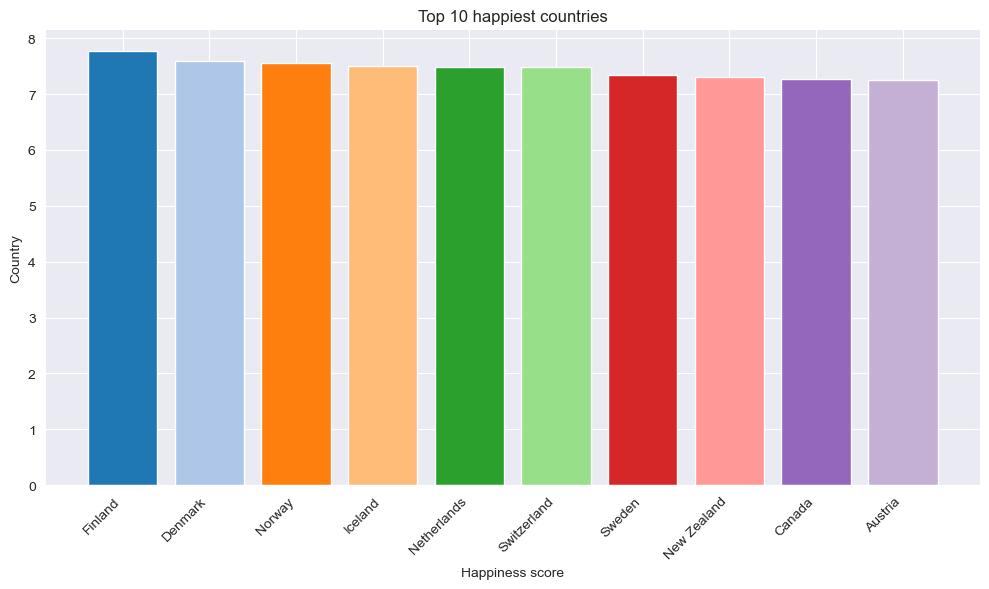

In [10]:
#Bar Chart Top 10 happiest countries

# sort data by happiness rating in descending order
sorted_data = df.sort_values(by='Score', ascending=False)
#choose top 10 countries
top_10 = sorted_data.head(10)
# generating a "colormap" with as many unique colors as we have bars
cmap = plt.get_cmap('tab20')
# creation of a bar chart with automatic assignment of different colors from the colormap
colors = cmap(np.arange(len(top_10)))
# creating graphs for the top 10 countries
plt.figure(figsize=(10, 6))
plt.bar(top_10['Country or region'], top_10['Score'], color=colors)
plt.xlabel('Happiness score')
plt.ylabel('Country')
plt.title('Top 10 happiest countries')
plt.xticks(rotation=45)
plt.xticks(rotation=45, ha="right") 
# Display graphics
plt.tight_layout() 
plt.show()

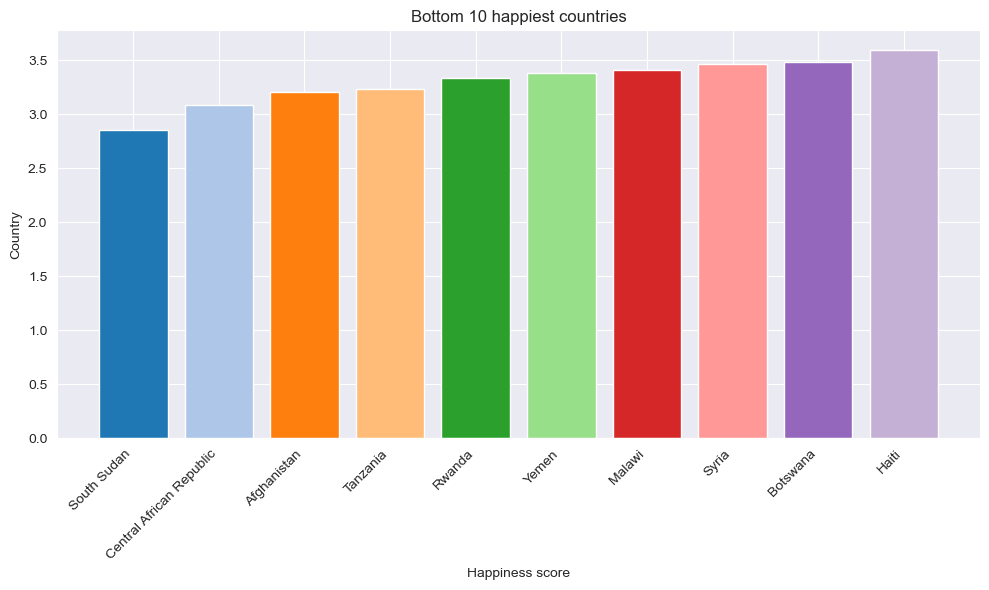

In [11]:
#Bar Chart Bottom 10 countries
bottom_10 = sorted_data.tail(10).sort_values(by='Score', ascending=True)
cmap = plt.get_cmap('tab20')
colors = cmap(np.arange(len(top_10)))
plt.figure(figsize=(10, 6))
plt.bar(bottom_10['Country or region'], bottom_10['Score'], color=colors)
plt.xlabel('Happiness score')
plt.ylabel('Country')
plt.title('Bottom 10 happiest countries')
plt.xticks(rotation=45)
plt.xticks(rotation=45, ha="right") 
# Display graphics
plt.tight_layout() 
plt.show()

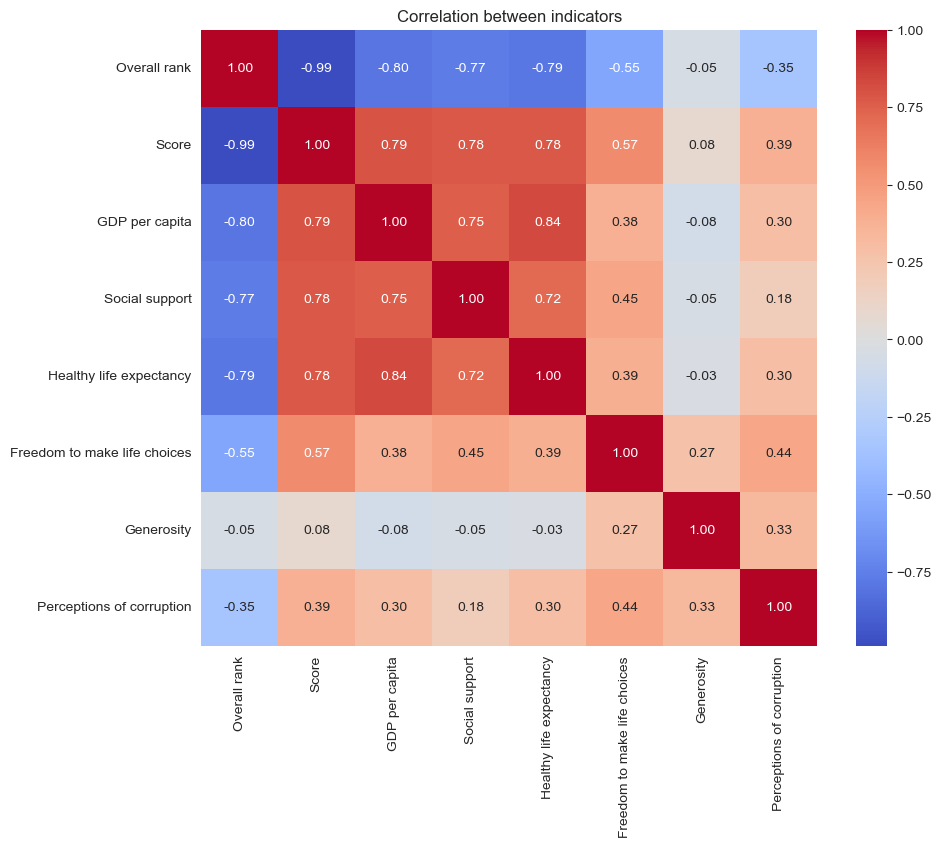

In [12]:
#Creating Heatmap for visualizing correlations

#data generation
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_cols].corr()

#creating heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation between indicators')
plt.show()

In [17]:
#Creating an interactive choropleth map that shows the distribution of happiness by country

def get_iso3(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None

df['ISO3'] = df['Country or region'].apply(get_iso3)

fig = px.choropleth(
    df,
    locations='ISO3',
    locationmode='ISO-3',
    color='Score',
    hover_name='Country or region',
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Geographical distribution of happiness by country',
    labels={'Score': 'Happiness score'},
)

fig.update_geos(showcoastlines=True, coastlinecolor="Black")
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()


In [21]:
df.drop(columns=['ISO3'], inplace=True)

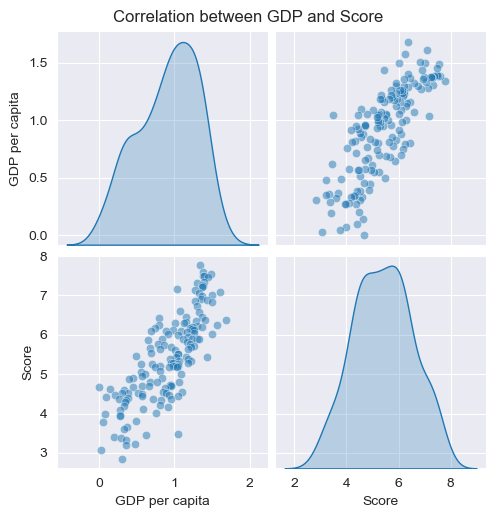

In [22]:
#Creation of Pair Plot of GDP and Score correlation

# choosing only columns 'GDP per capita' i 'Score'
gdp_score_df = df[['GDP per capita', 'Score']]
# creating pair plot for selected columns
sns.pairplot(gdp_score_df, diag_kind='kde', markers='o', plot_kws={'alpha': 0.5})
# display
plt.suptitle('Correlation between GDP and Score', y=1.02)  
plt.show()

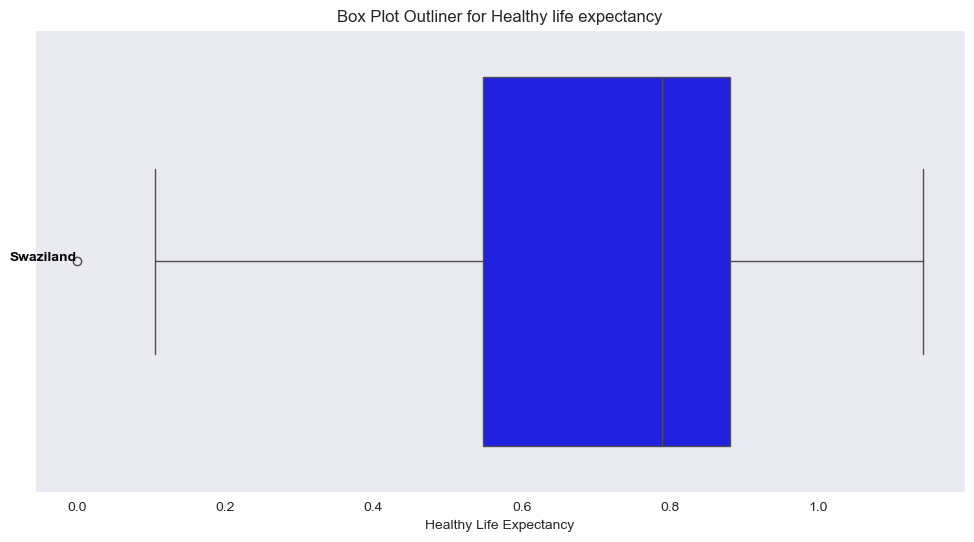

In [23]:
#Outliners for life expectancy

# calculation of Q1, Q3 and IQR for the column 'Healthy life expectancy'
Q1 = df['Healthy life expectancy'].quantile(0.25)
Q3 = df['Healthy life expectancy'].quantile(0.75)
IQR = Q3 - Q1
# defining lower and upper bounds
lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR
# identifying outliners 
outliners = df[(df['Healthy life expectancy'] < lb) | 
                     (df['Healthy life expectancy'] > ub)]

# creating a Box Plot to display outliners
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Healthy life expectancy'], color='blue')
for index, row in outliners.iterrows():
    plt.text(row['Healthy life expectancy'], 0, row['Country or region'], 
             horizontalalignment='right', size='medium', color='black', weight='semibold')

plt.title('Box Plot Outliner for Healthy life expectancy')
plt.xlabel('Healthy Life Expectancy')
plt.grid(axis='x')
plt.show()


In [24]:
# checking for missing values
print("Missing values by column:")
print(df.isnull().sum())


Missing values by column:
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


There are no missing values ​​so no additional data cleaning is required ie. filling or removing rows/columns with empty values.

Since there are no missing values, we immediately proceed to scaling the data. Scaling is necessary because different columns have different ranges of values. We will use standardization ie. StandardScaler which standardizes the data so that each characteristic has an average value of 0 and a standard deviation of 1. This allows all attributes to have the same importance in the analysis.

In [26]:
numerical_columns = [
    "GDP per capita",
    "Social support",
    "Healthy life expectancy",
    "Freedom to make life choices",
    "Generosity",
    "Perceptions of corruption",
]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_columns])

#creating a scaled DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)
scaled_df.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.095042,1.268098,1.080422,1.424282,-0.335404,2.996757
1,1.203324,1.221154,1.121857,1.396277,0.707265,3.177158
2,1.467734,1.251332,1.254446,1.473292,0.907373,2.444941
3,1.195769,1.392163,1.246159,1.389276,1.781530,0.078500
4,1.236060,1.050146,1.134287,1.151229,1.444506,1.988632


We can see that the "GDP per capita" column, which previously had values higher than the average, as well as the "Generosity" column, which had values below the average, now have values in the area closer to 0. So, the numerical data has been successfully standardized. This allows the correct application of methods that depend on scaled values, such as PCA and correlation analyses.

We further perform Correlation Analysis to reveal mutual relationships between factors (positive or negative relationships). We will use Correlation Visualization to better understand the data.

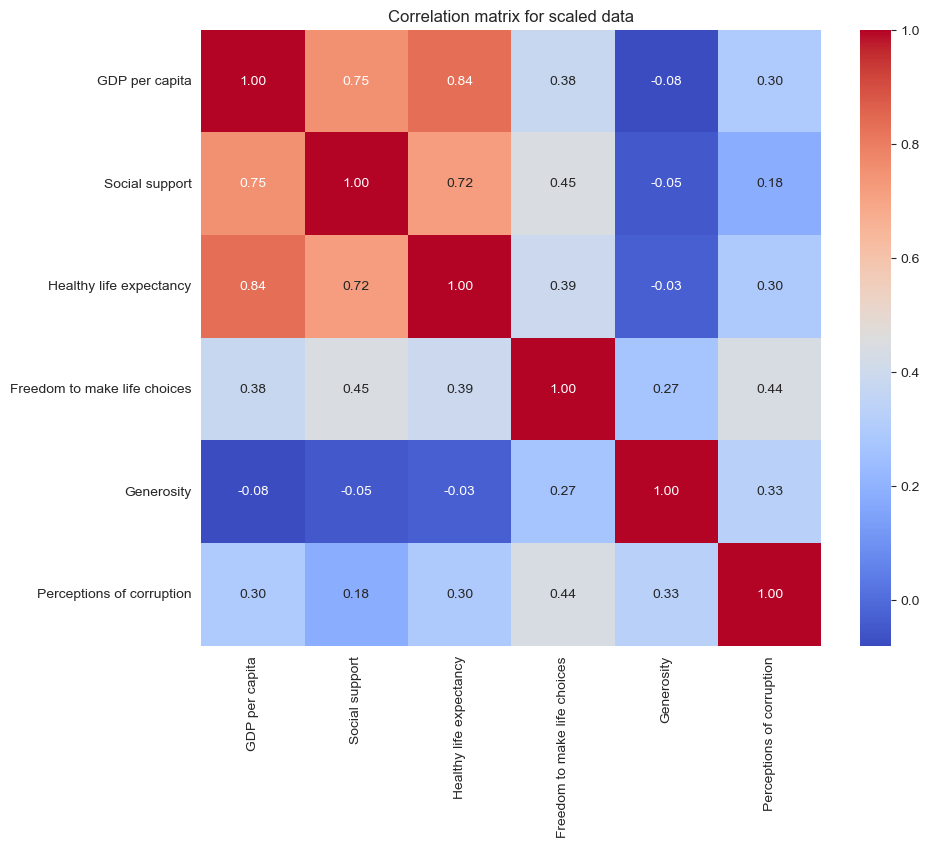

In [27]:
correlation_matrix = scaled_df.corr()

# Visualization of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix for scaled data")
plt.show()


The correlation matrix indicates a high degree of connection between the factors, such as a strong positive correlation between GDP per capita and Healthy life expectancy, as well as the column GDP per capita and Social support. This means that when one grows, the other also grows, and vice versa. These variables can share similar information, which means that their values can predict each other to a certain extent. That's why we will use PCA ie. data dimensionality reduction.

PCA reduces the dimensionality of the data, retaining as much information as possible. Applying PCA is useful when we have high-dimensional data to reduce complexity and visualize the structure of the data.

Explained variance by components:
Component 1: 0.50
Component 2: 0.24
Component 3: 0.10
Component 4: 0.09
Component 5: 0.04
Component 6: 0.03


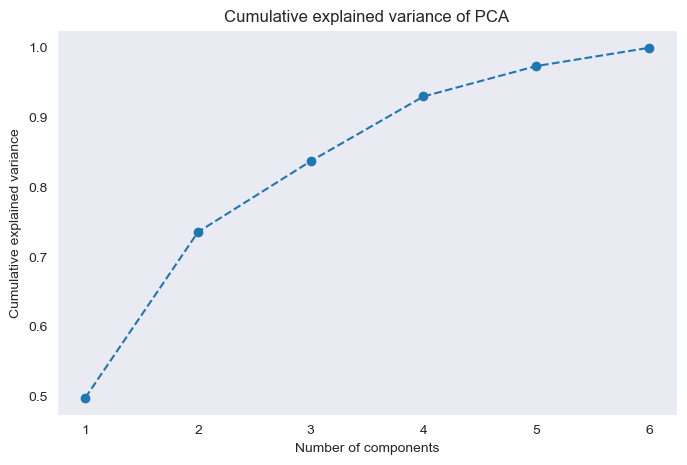

PCA results (first 5 rows):
        PC1       PC2       PC3       PC4       PC5       PC6
0  3.134226  1.053542  1.923436  0.292394  0.584557 -0.189733
1  3.292053  1.836057  1.471747 -0.238936  0.550629 -0.082923
2  3.338247  1.537896  0.788607 -0.230770  0.267636  0.097779
3  2.592776  0.945854 -1.538589 -0.175867 -0.105343  0.067656
4  2.835104  1.685571  0.225374 -0.561250  0.184424  0.071187


In [30]:
#PCA initialization
pca = PCA()

#applying PCA to scaled data
pca_data = pca.fit_transform(scaled_data)

#variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance by components:")
for i, var_ratio in enumerate(explained_variance_ratio):
    print(f"Component {i + 1}: {var_ratio:.2f}")

#visualization of cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title("Cumulative explained variance of PCA")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.grid()
plt.show()

#adding the PCA results back to the DataFrame
pca_df = pd.DataFrame(pca_data, columns=[f"PC{i+1}" for i in range(len(explained_variance_ratio))])
print("PCA results (first 5 rows):")
print(pca_df.head())

The variance scores by component show us what percentage of the total variation in the data is explained by each principal component (PC1, PC2, etc.). The first component (PC1) explains 50% of the variance, which means that it contains most of the information from the original data.
The second component (PC2) adds another 24% of the variance, meaning that together PC1 and PC2 explain 74% of the total variance.
Subsequent components have decreasing contributions (PC3, PC4, etc.), indicating that most of the information lies in the first few components.
A graph of cumulative explained variances shows that the first two components together account for more than 70% of the variance, which is often sufficient for data analysis and interpretation.
A new DataFrame with PCA results contains values for the principal components (PC1, PC2, etc.).
These components use linear transformations to summarize the original data into a form that is easier to analyze, visualize and model.


Hypothesis testing involves setting up a null hypothesis (H₀) and an alternative hypothesis (H₁) and then using statistical tests to decide whether we can reject the null hypothesis based on the available data.

Hypotheses to test:
Hypothesis 1: There is no significant difference in the average score between the two groups of countries with high and low GDP per capita.
Test: Independent samples t-test (parametric) or Mann-Whitney U test (non-parametric).
Hypothesis 2: The distribution of social support is not normal.
Test: Shapiro-Wilk test to confirm results.
Hypothesis 3: There is a significant correlation between GDP per capita and Score.
Test: Pearson correlation (parametric) and Spearman correlation (non-parametric).

In [31]:
# H1: Comparison of average score values between high and low GDP groups
median_gdp = df["GDP per capita"].median()
high_gdp = df[df["GDP per capita"] > median_gdp]["Score"]
low_gdp = df[df["GDP per capita"] <= median_gdp]["Score"]

# Independent samples t-test
t_stat, t_p_value = ttest_ind(high_gdp, low_gdp, equal_var=False)

# Mann-Whitney U test (alternative for non-parametric data)
u_stat, u_p_value = mannwhitneyu(high_gdp, low_gdp)

# H2: Normality testing for "Social support"
shapiro_stat, shapiro_p = shapiro(df["Social support"])

# H3: Correlation between "GDP per capita" and "Score"
pearson_corr, pearson_p = pearsonr(df["GDP per capita"], df["Score"])
spearman_corr, spearman_p = spearmanr(df["GDP per capita"], df["Score"])

# Results
print("Hypothesis 1: Difference in score between high and low GDP")
print(f"T-test: Stat = {t_stat:.3f}, p-value = {t_p_value:.3f}")
print(f"Mann-Whitney U test: Stat = {u_stat:.3f}, p-value = {u_p_value:.3f}")

print("\nHypothesis 2: Normality Testing for Social Support")
print(f"Shapiro-Wilk test: Stat = {shapiro_stat:.3f}, p-value = {shapiro_p:.3f}")

print("\nHypothesis 3: Correlation between GDP per capita and Score")
print(f"Pearson correlation: Coefficient = {pearson_corr:.3f}, p-value = {pearson_p:.3f}")
print(f"Spearman Correlation: Coefficient = {spearman_corr:.3f}, p-value = {spearman_p:.3f}")

Hypothesis 1: Difference in score between high and low GDP
T-test: Stat = 11.231, p-value = 0.000
Mann-Whitney U test: Stat = 5465.500, p-value = 0.000

Hypothesis 2: Normality Testing for Social Support
Shapiro-Wilk test: Stat = 0.907, p-value = 0.000

Hypothesis 3: Correlation between GDP per capita and Score
Pearson correlation: Coefficient = 0.794, p-value = 0.000
Spearman Correlation: Coefficient = 0.814, p-value = 0.000


Hypothesis 1:
If the p-value is < 0.05, there is a significant difference in the average Score values between the groups.
T-test results are relevant if the data follows a normal distribution; otherwise use the Mann-Whitney U test.

Hypothesis 2:
If the p-value is < 0.05 for the Shapiro-Wilk test, the data for Social support do not follow a normal distribution.

Hypothesis 3:
Pearson's correlation is used for linear relationships when the data follow a normal distribution.
Spearman's correlation is more robust and is used for all types of distributions.



Results:

Hypothesis 1: Difference in score (Score) between high and low GDP

t-test:
Statistics = 11,231: This is the value of the test statistic that measures the difference between the average Score values ​​for the two groups (high GDP and low GDP).
p-value = 0.000: Since the p-value is significantly less than 0.05, we reject the null hypothesis. This means that there is a significant difference in average Score values ​​between groups with high and low GDP.

Mann-Whitney U test:
Stat = 5465,500: This is the value of the U-test statistic used to compare groups without the assumption of a normal distribution.
p-value = 0.000: As with the T-test, the p-value is very small, confirming a significant difference between the two groups.
Conclusion: Countries with high GDP have a significantly higher Score than countries with low GDP.
The results of both tests (parametric and non-parametric) are consistent.

Hypothesis 2: Normality testing for Social support

Shapiro-Wilk test:
Statistic = 0.907: This value shows a deviation from a normal distribution.
p-value = 0.000: Since the p-value is less than 0.05, we reject the hypothesis that the data follow a normal distribution.
Conclusion: Social support does not follow a normal distribution. Nonparametric methods should be used for this variable in further analyses.

Hypothesis 3: Correlation between GDP per capita and Score

Pearson correlation:
Coefficient = 0.794: This indicates a very strong positive linear relationship between GDP per capita and Score.
p-value = 0.000: A p-value less than 0.05 confirms that this correlation is statistically significant.

Spearman correlation:
Coefficient = 0.814: This indicates a very strong monotonic relationship between GDP per capita and Score.
p-value = 0.000: Statistically significant correlation, regardless of data distribution.
Conclusion: There is a very strong and statistically significant positive relationship between GDP per capita and Score. Countries with a higher GDP usually have a higher score.

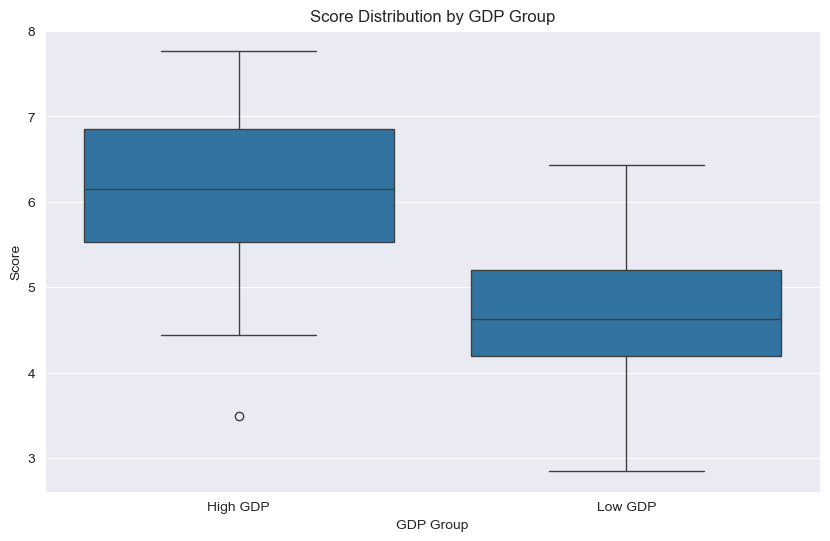

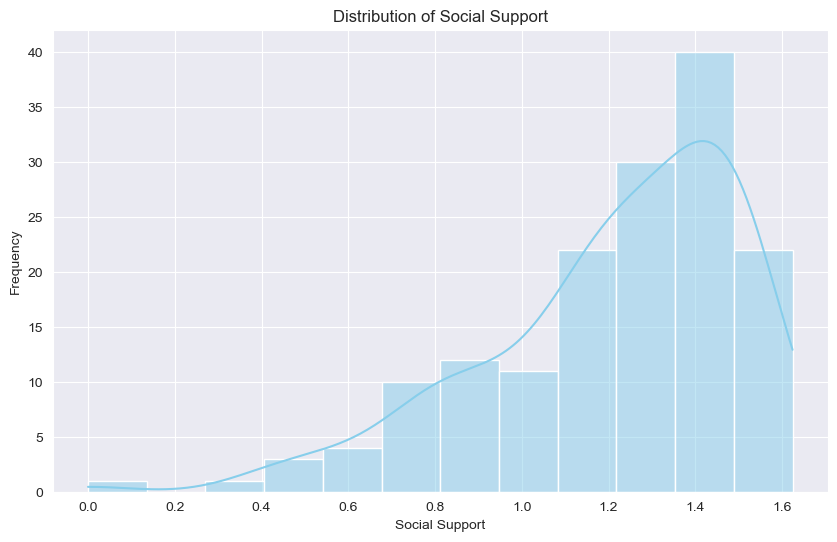

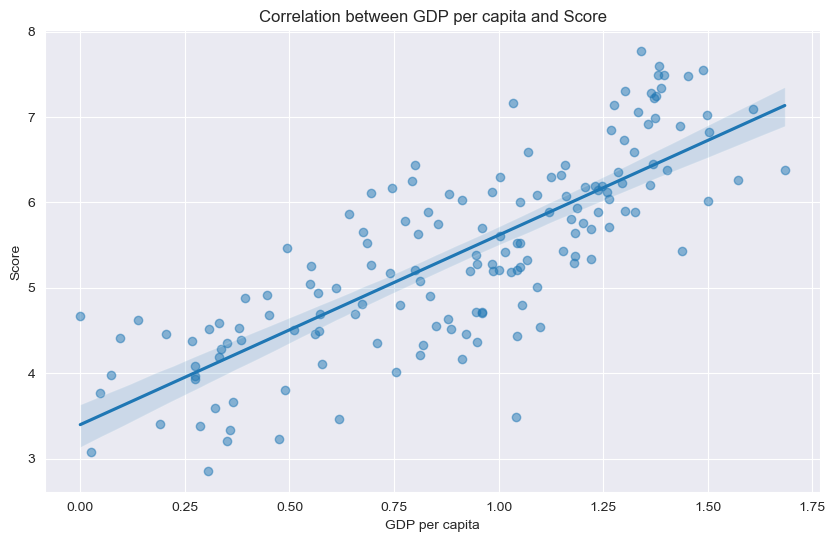

In [32]:
#Visualizations for hypotheses

# Hypothesis 1: Boxplot for high and low GDP
plt.figure(figsize=(10, 6))
sns.boxplot(x=["High GDP"] * len(high_gdp) + ["Low GDP"] * len(low_gdp),
            y=high_gdp.tolist() + low_gdp.tolist())
plt.title("Score Distribution by GDP Group")
plt.ylabel("Score")
plt.xlabel("GDP Group")
plt.show()

# Hypothesis 2: Histogram for "Social support"
plt.figure(figsize=(10, 6))
sns.histplot(df["Social support"], kde=True, color="skyblue")
plt.title("Distribution of Social Support")
plt.xlabel("Social Support")
plt.ylabel("Frequency")
plt.show()

# Hypothesis 3: Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x="GDP per capita", y="Score", data=df, scatter_kws={"alpha": 0.5})
plt.title("Correlation between GDP per capita and Score")
plt.xlabel("GDP per capita")
plt.ylabel("Score")
plt.show()


Mean squared error (MSE) for linear regression: 0.4144641383528353
Metrics for logistic regression:
Accuracy: 0.8125
Precision: 0.7368421052631579
Recall: 0.9333333333333333
F1 score: 0.8235294117647058


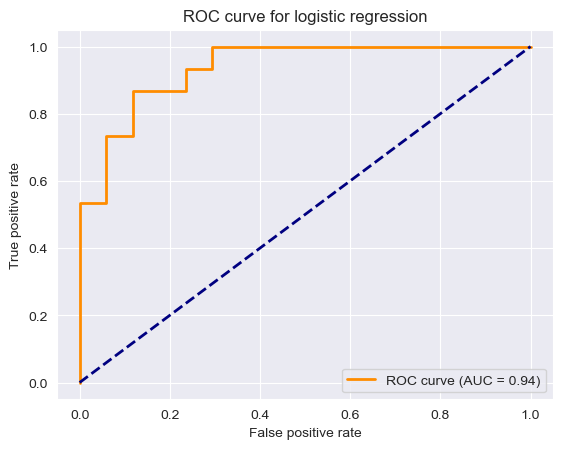

In [34]:
# Data preparation
X = df[["GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]]
y_reg = df["Score"]  # Target variable for regression
y_class = (df["Score"] > df["Score"].mean()).astype(int)  # Target variable for classification

# Splitting data into training and test sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Linear regression
linear_model = LinearRegression()
linear_model.fit(X_train_reg, y_train_reg)

# Predictions for regression
y_pred_reg = linear_model.predict(X_test_reg)

# Regression evaluation
mse = mean_squared_error(y_test_reg, y_pred_reg)
print("Mean squared error (MSE) for linear regression:", mse)

# Logistic regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_class, y_train_class)

# Classification predictions
y_pred_class = logistic_model.predict(X_test_class)

# Classification evaluation
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class)
recall = recall_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class)
print("Metrics for logistic regression:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

# ROC curve and AUC for logistic regression
fpr, tpr, thresholds = roc_curve(y_test_class, logistic_model.predict_proba(X_test_class)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for logistic regression')
plt.legend(loc='lower right')
plt.show()

In [38]:
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows")

# Data normalization for neural networks
scaler = StandardScaler()
X_train_class = scaler.fit_transform(X_train_class)
X_test_class = scaler.transform(X_test_class)

# K-means clustering
os.environ['OMP_NUM_THREADS'] = '1'
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_labels = kmeans.labels_
silhouette_avg = silhouette_score(X, kmeans_labels)
print("K-means clustering - Centroids:")
print(kmeans.cluster_centers_)
print(f"Average silhouette score: {silhouette_avg:.2f}")

# Decision trees
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_class, y_train_class)
y_pred_tree = tree_model.predict(X_test_class)
tree_acc = accuracy_score(y_test_class, y_pred_tree)
tree_prec = precision_score(y_test_class, y_pred_tree)
tree_rec = recall_score(y_test_class, y_pred_tree)
tree_f1 = f1_score(y_test_class, y_pred_tree)
print("Decision trees - Evaluation metrics:")
print(f"Accuracy: {tree_acc:.2f}, Precision: {tree_prec:.2f}, Recall: {tree_rec:.2f}, F1 score: {tree_f1:.2f}")

# Perceptrons and neural networks with increasing iterations
mlp_model = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=2000, random_state=42)
mlp_model.fit(X_train_class, y_train_class)
y_pred_mlp = mlp_model.predict(X_test_class)
mlp_acc = accuracy_score(y_test_class, y_pred_mlp)
mlp_prec = precision_score(y_test_class, y_pred_mlp)
mlp_rec = recall_score(y_test_class, y_pred_mlp)
mlp_f1 = f1_score(y_test_class, y_pred_mlp)
print("Neural networks - Evaluation metrics:")
print(f"Accuracy: {mlp_acc:.2f}, Precision: {mlp_prec:.2f}, Recall: {mlp_rec:.2f}, F1 score: {mlp_f1:.2f}")

# Backpropagation with MLPClassifier
mlp_backprop_model = MLPClassifier(hidden_layer_sizes=(20, 20), activation='relu', solver='adam', max_iter=3000, random_state=42)
mlp_backprop_model.fit(X_train_class, y_train_class)
y_pred_mlp_backprop = mlp_backprop_model.predict(X_test_class)
mlp_backprop_acc = accuracy_score(y_test_class, y_pred_mlp_backprop)
mlp_backprop_prec = precision_score(y_test_class, y_pred_mlp_backprop)
mlp_backprop_rec = recall_score(y_test_class, y_pred_mlp_backprop)
mlp_backprop_f1 = f1_score(y_test_class, y_pred_mlp_backprop)
print("Back Propagation Neural Networks - Evaluation Metrics:")
print(f"Accuracy: {mlp_backprop_acc:.2f}, Precision: {mlp_backprop_prec:.2f}, Recall: {mlp_backprop_rec:.2f}, F1 score: {mlp_backprop_f1:.2f}")

# Conclusions
print("# Conclusions:")
if tree_acc > max(mlp_acc, mlp_backprop_acc):
    print("Decision trees have the best performance in terms of accuracy.")
elif mlp_backprop_acc > mlp_acc:
    print("Back-propagation neural networks have the best performance in terms of accuracy.")
else:
    print("Standard neural networks perform better in terms of accuracy.")

if tree_f1 > max(mlp_f1, mlp_backprop_f1):
    print("Decision trees have the best balance between precision and responsiveness (F1-score).")
elif mlp_backprop_f1 > mlp_f1:
    print("Back-propagation neural networks have the best balance between precision and responsiveness (F1-score).")
else:
    print("Standard neural networks have a better balance between precision and responsiveness (F1-score).")

# Explanation for the success of the model
print("Explanation for model success:")
print("Decision trees are easy to interpret and can be fitted to data, but are prone to overfitting.")
print("Neural networks are powerful for complex problems, and back-propagation allows efficient learning of complex patterns, making them suitable for this dataset.")
print("K-means clustering is useful for discovering patterns in data without a target variable and provides additional insights into the structure of a data set.")

K-means clustering - Centroids:
[[0.89747368 1.2445614  0.75001754 0.38945614 0.16438596 0.07561404]
 [0.38974419 0.85339535 0.41223256 0.31081395 0.206      0.09946512]
 [1.30871429 1.44533929 0.940375   0.45851786 0.18942857 0.15476786]]
Average silhouette score: 0.33
Decision trees - Evaluation metrics:
Accuracy: 0.84, Precision: 0.81, Recall: 0.87, F1 score: 0.84
Neural networks - Evaluation metrics:
Accuracy: 0.81, Precision: 0.76, Recall: 0.87, F1 score: 0.81
Back Propagation Neural Networks - Evaluation Metrics:
Accuracy: 0.81, Precision: 0.76, Recall: 0.87, F1 score: 0.81
# Conclusions:
Decision trees have the best performance in terms of accuracy.
Decision trees have the best balance between precision and responsiveness (F1-score).
Explanation for model success:
Decision trees are easy to interpret and can be fitted to data, but are prone to overfitting.
Neural networks are powerful for complex problems, and back-propagation allows efficient learning of complex patterns, makin